# Eigenvalues, Eigenvectors, Principal Components, and Singular Values Computation

- **Course:** CS660/71425 Mathematical Foundations of Analytics
- **Instructor:** Prof. Sarbanes
- **Group-1:** Will Torres, Mike Griffin, Watson Blair, Syed Abdul Mubashir, Abdul Munaf Mohammed
- **Semester:** Fall 2024
- **Project #:** 2
- **Due Date:** 04-Nov-2024

## Project Description
The primary objectives of this project are to:
- Develop custom Python functions to compute Eigenvalues and Eigenvectors of a matrix.
- Implement a Principal Components Analysis (PCA) from scratch, following the standard steps involved in PCA computation.
- Create a function for Singular Value Decomposition (SVD), including the derivation of U, Σ, and V matrices.
- Compare the runtime performance of our custom implementations against Python’s built-in libraries, specifically NumPy and Scikit-learn.

Secondary objectives include
- Gain experience working with github.
- Explore how to make our workflow more efficient.
- Gain sensitivity for algorithmic efficiency of code produced.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from helpers.Process_Matrix.process_matrix import BenchmarkUtility

## Analysis

In [2]:
# Define sample sizes for analysis
matrix_sizes = [10, 25, 50, 75, 100, 250, 500]
data_list = [np.random.rand(n, n) for n in matrix_sizes]
labels = [f'{n}x{n}' for n in matrix_sizes]

# Iterate through each data matrix in data_list
processor = BenchmarkUtility(labels=labels)
processor.batch_benchmark(data_list)

In [3]:
print("\nAll Execution Times:")
for key, times in processor.execution_times.items():
    print(f"{key}: {times}")


All Execution Times:
manual_eig: [0.013012886047363281, 0.4522838592529297, 2.3347651958465576, 5.2379679679870605, 10.104458093643188, 45.18967318534851, 146.6706521511078]
sklearn_eig: [5.221366882324219e-05, 0.002115964889526367, 0.0010139942169189453, 0.00407099723815918, 0.010855913162231445, 0.4164867401123047, 0.1290438175201416]
manual_pca: [0.0005650520324707031, 0.016089200973510742, 0.01491689682006836, 0.1293790340423584, 0.30005812644958496, 1.324408769607544, 6.623323917388916]
sklearn_pca: [0.00034880638122558594, 0.00420689582824707, 0.0007469654083251953, 0.005950927734375, 0.06075906753540039, 0.022422075271606445, 0.09167981147766113]
manual_svd: [0.00012493133544921875, 0.021908044815063477, 0.0013551712036132812, 0.08117413520812988, 0.19678783416748047, 1.0623970031738281, 0.6083531379699707]
sklearn_svd: [2.3126602172851562e-05, 0.0021898746490478516, 0.00028896331787109375, 0.005605936050415039, 0.012871742248535156, 0.14399504661560059, 0.0628359317779541]


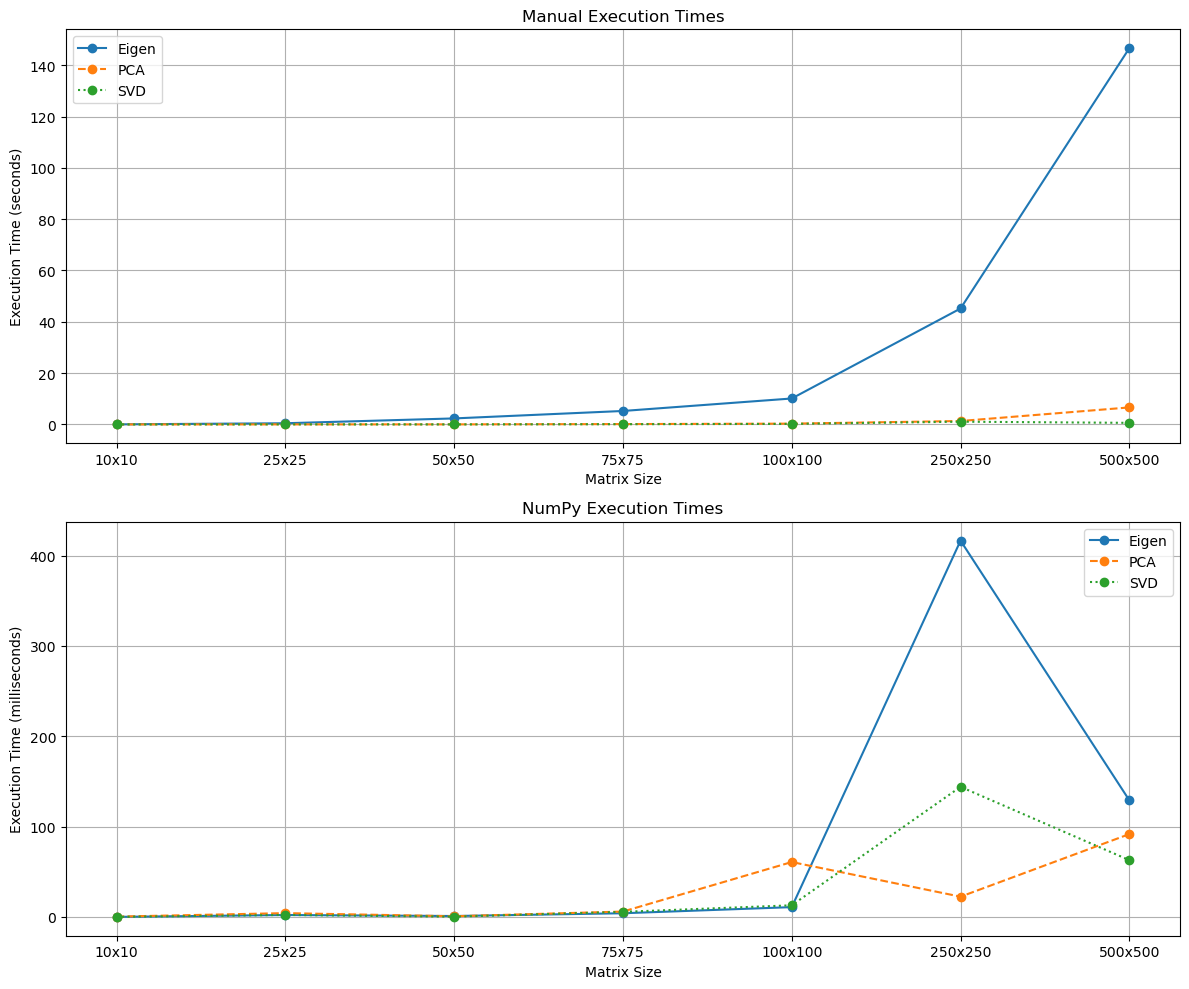

In [4]:
processor.plot_execution_times() 

# Findings and Impressions

- NumPy utilities are far more efficient than any code we wrote.
    - NumPy Eigen and SVD functions are sensitive to matrix size to reduce execution time for matrices larger than 250 x 250, and most likely adjust how these values are derived to ensure efficient computation.
- 

## SVD
As we approached Singular Value Decomposition, our primary focus was to maximize transparency in the process. Singular Value is not in and of itself a complicated process, but making sure that each step of the calculation is distinct, allowing for any errors to be quickly and efficiently identified, was essential.
We did use array-based numpy helpers to create transposes and copy matrices, but utilized a standard ‘for’ loop to build the Singular Value Array.
After initially nesting ‘for’ loops that applied to both the U and V matrix, I found that an error was being thrown once the matrices had to be multiplied together; I made the decision to create separate iterative functions for U and V, allowing them to be calculated separately from one another.
I have found that the numpy .svd helper function only provides the three matrices, while my function calculates the singular functions directly.